In [3]:
import pandas as pd
from sklearn import datasets
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score


In [4]:
#1. Realice un resumen estadístico de sus datos.

iris = datasets.load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# 1a. Obtenga un resumen estadístico de los datos

iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


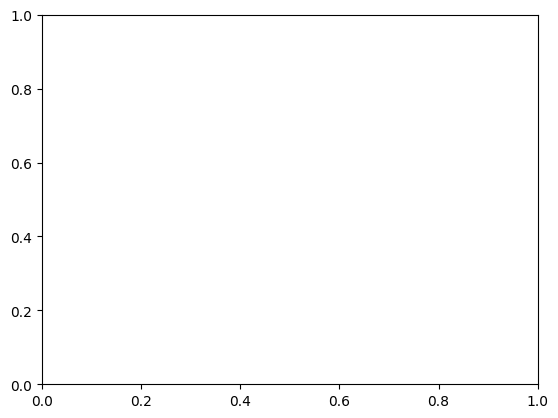

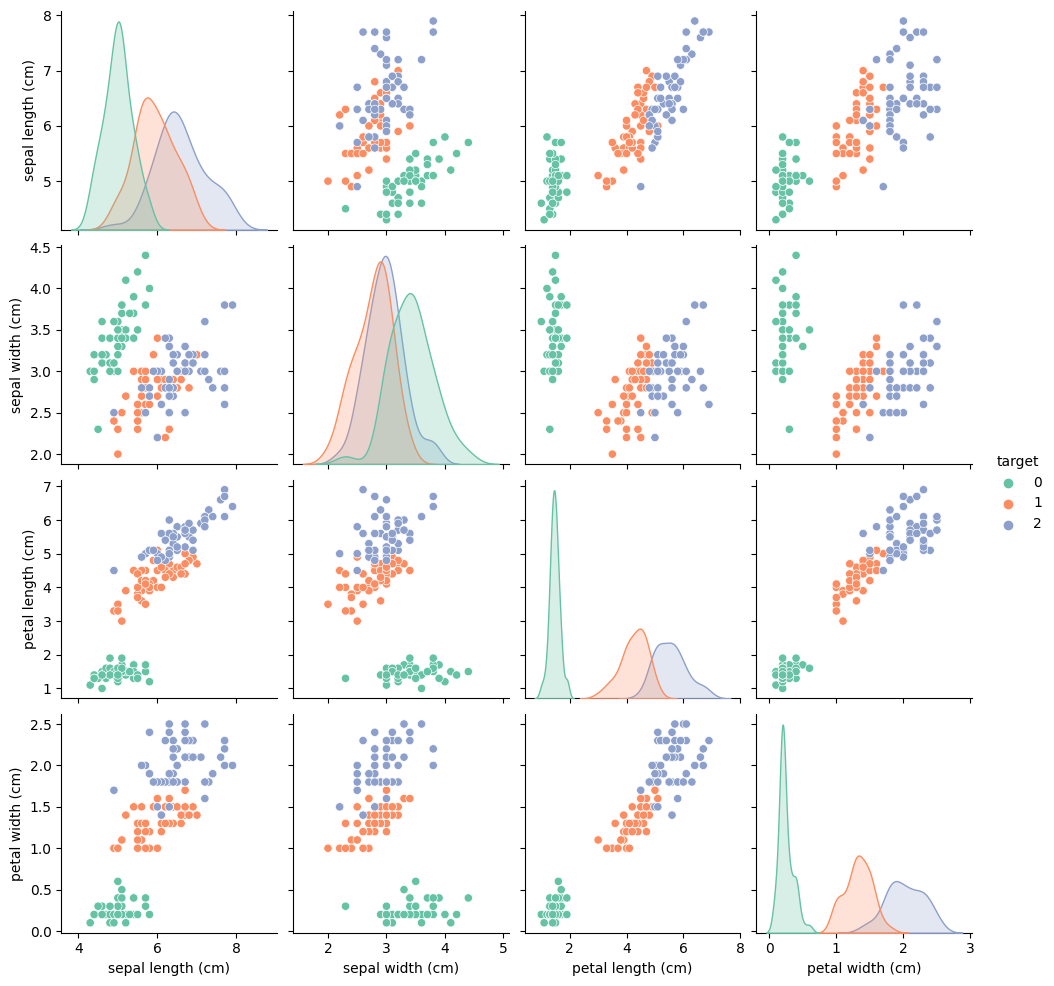

In [5]:
X = iris_df.drop(['target'], axis=1)
z = iris_df.target # etiquetas de los clusters

fig, ax = plt.subplots()
cmap = ListedColormap(['red', 'blue', 'green'])
#Agregar una barra de color para mostrar la correspondencia entre los colores y los clusters
sns.pairplot(iris_df, hue='target', palette='Set2', diag_kind='kde', height=2.5)


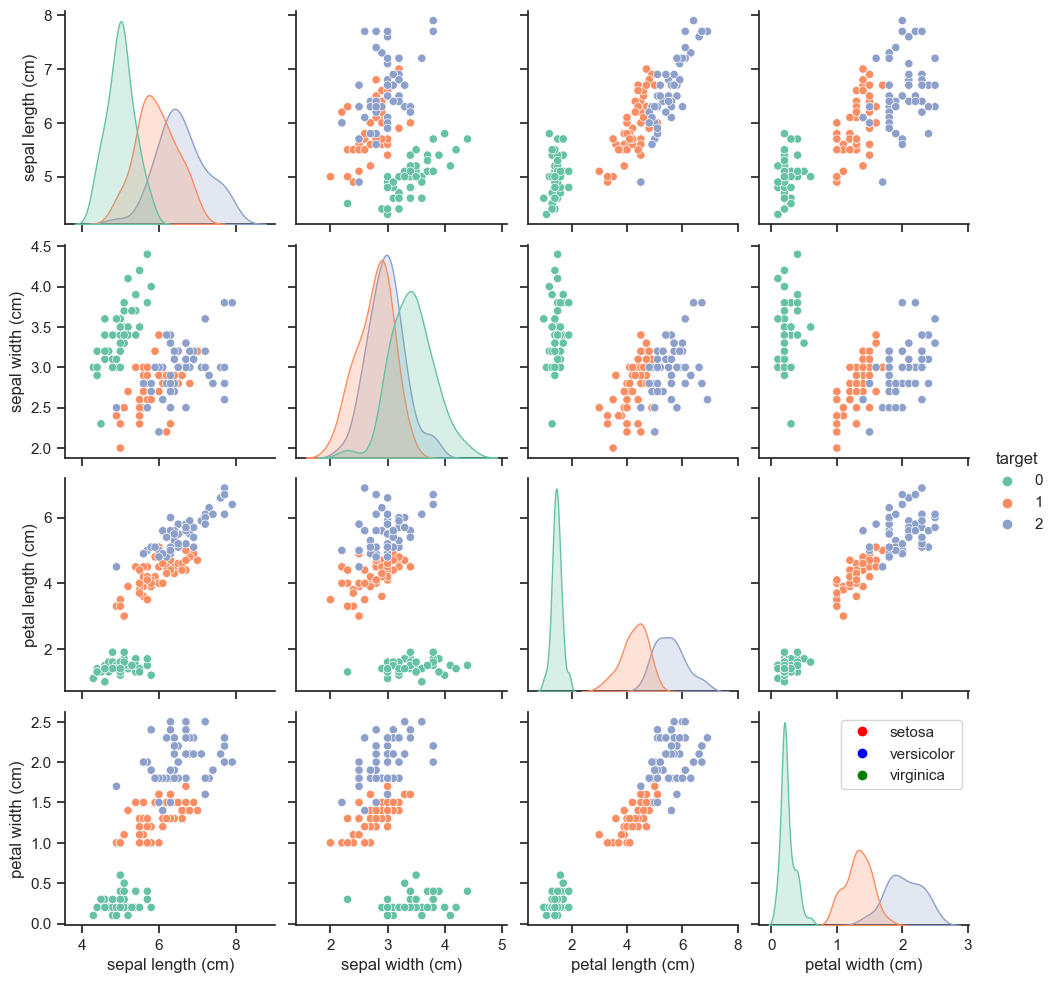

In [6]:
#2. Entregue gráficos que acompañen los hallazgos encontrados en el punto
1.

X = iris_df.drop(['target'], axis=1)
z = iris_df.target  # etiquetas de los clusters

sns.set(style="ticks")
sns.pairplot(iris_df, hue='target', palette='Set2', diag_kind='kde', height=2.5)

# Agregar una barra de color para mostrar la correspondencia entre los colores y los clusters
cmap = ListedColormap(['red', 'blue', 'green'])
handles = [plt.Line2D([], [], marker="o", ls="", color=color) for color in cmap.colors]
plt.legend(handles, iris.target_names)

plt.show()

In [11]:
#3. Encuentre una relación o grafique las variables: op, ex y ag, además de las categorías.

# SSE scores
sse_scores = []
silhouette_scores = []

# Perform k-means clustering for k values from 2 to 8
k_values = range(2, 9)

for k in k_values:
    # Fit the k-means model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Compute SSE (inertia)
    sse = kmeans.inertia_
    sse_scores.append(sse)

    # Calculate Silhouette score
    labels = kmeans.labels_
    silhouette = silhouette_score(X, labels)
    silhouette_scores.append(silhouette)

C:\Users\bebit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bebit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bebit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

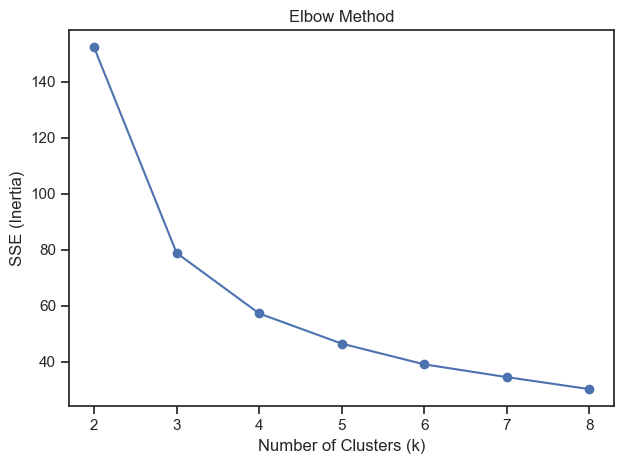

In [13]:
# Plot SSE and silhouette scores
fig, ax = plt.subplots()

# Plot SSE
ax.plot(k_values, sse_scores, marker='o')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('SSE (Inertia)')
ax.set_title('Elbow Method')

plt.tight_layout()


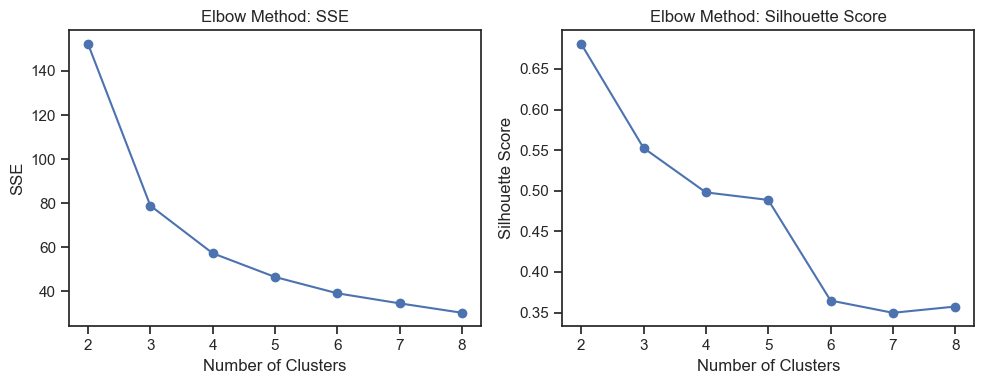

In [14]:
# Plot SSE and silhouette scores
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(k_values, sse_scores, marker='o')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('SSE')
ax[0].set_title('Elbow Method: SSE')

ax[1].plot(k_values, silhouette_scores, marker='o')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Elbow Method: Silhouette Score')

plt.tight_layout()


In [17]:
#4. Determine cuántos k o clúster son adecuados para esta consulta.

k = 4
# Fit the k-means model
kmeans = KMeans(
    n_clusters=k,
    n_init='auto',
    random_state=42
)
kmeans.fit(X)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [18]:
#5. Realice un modelo de k means con los cluster definidos en el punto 4.
y = kmeans.predict(X)
# agregar y a iris_df
iris_df['prediccion'] = y


In [19]:
np.unique(y)

array([0, 1, 2, 3])

Text(0.5, 1.0, 'Clústeres')

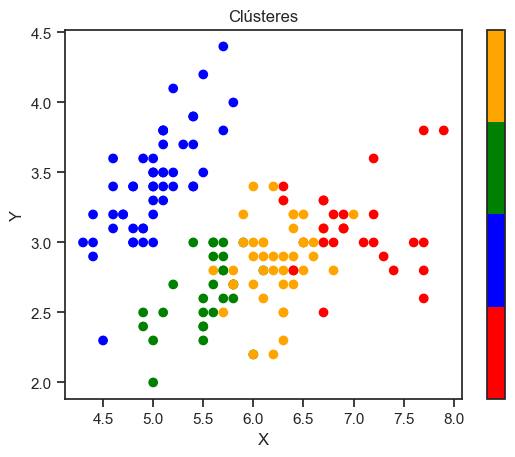

In [21]:
#6. Entregue una representación gráfica de los cluster.

fig, ax = plt.subplots()

# Define una escala de colores con la misma cantidad de colores que clústeres
cmap = ListedColormap(['red', 'blue', 'green', 'orange'])

# Gráfico de dispersión de los puntos de datos coloreados según las etiquetas de los clústeres
scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap)

# Agrega una barra de colores para mostrar la correspondencia entre los colores y los clústeres
colorbar = plt.colorbar(scatter)
colorbar.set_ticks([])

# Establece las etiquetas y el título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Clústeres')

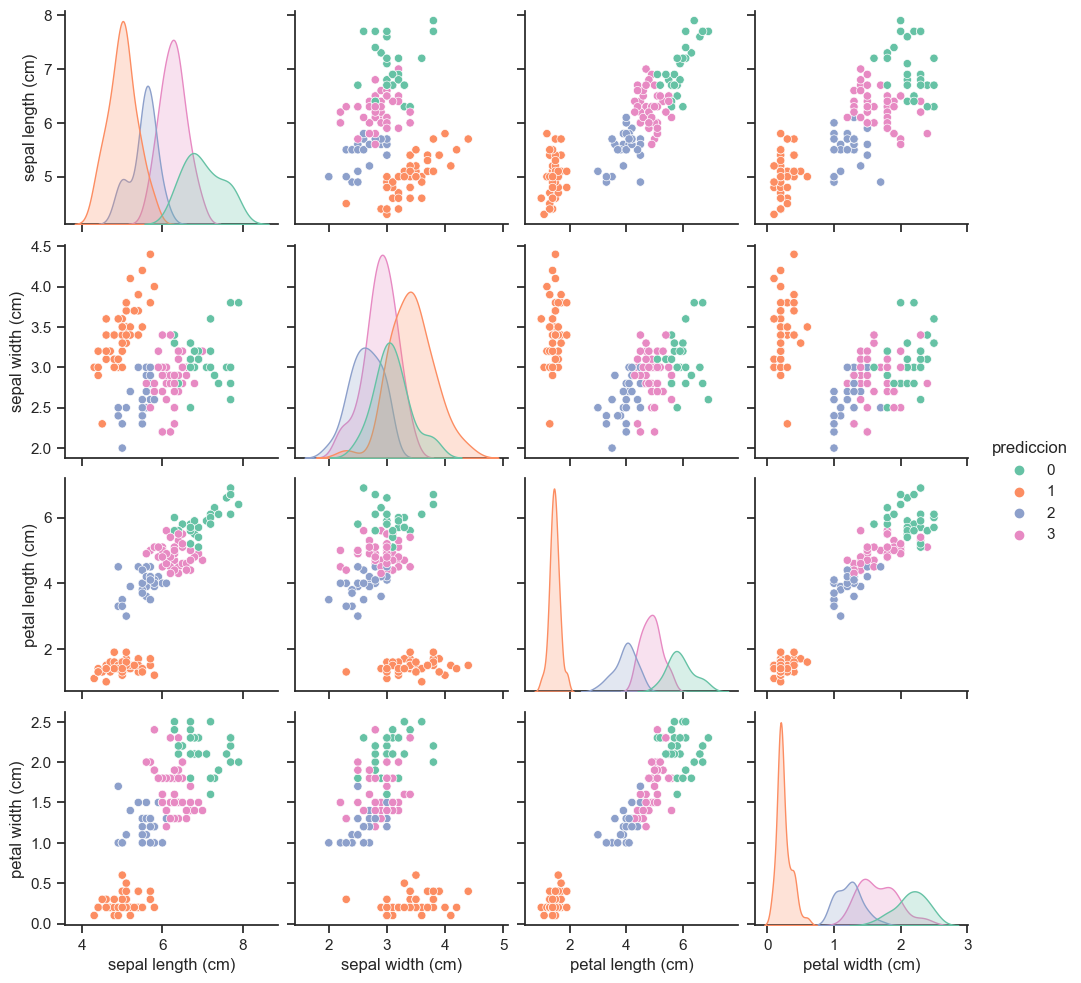

In [22]:
sns.pairplot(iris_df.drop(['target'], axis=1), hue='prediccion', palette='Set2', diag_kind='kde', height=2.5)




In [ ]:
#7. A qué conclusión llega y cuál es su recomendación como experto.

#Se  puede  obtener  de  este  análisis  es  que existen  4 clústeres adecuados para agrupar los datos de los clientes.  Esto implica que los clientes pueden ser 
#categorizados en 4 grupos distintos según sus características.
#Como experto, mi recomendación sería utilizar esta información de los clústeres para diseñar estrategias de marketing personalizadas para cada grupo de clientes. 
#Al comprender las  características y los intereses de cada clúster,  se pueden adaptar las campañas de  fidelización de la  empresa KEPPLER  para satisfacer las 
#necesidades específicas de cada grupo. Esto puede ayudar a aumentar la efectividad de las campañas y mejorar la relación con los clientes, lo que a su vez puede 
#impulsar el crecimiento y la rentabilidad de la empresa.